Paticipation

## Iris Dataset

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
# This loads our iris data into a numpy array
iris = load_iris()

In [3]:
# We like working in pandas so we convert and label our columns
irisdf = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Let's describe our data
irisdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [5]:
# Now let's normalize our data and describe it again
# Import our library
from sklearn.preprocessing import MinMaxScaler
# Scale our data using minmax normalization
scaler = MinMaxScaler()
irisnormdf = pd.DataFrame(scaler.fit_transform(irisdf), columns = irisdf.columns)
# Let's now restore our target values
irisnormdf.target = irisnormdf.target * 2
# Now let's display our normalized dataframe
display(irisnormdf)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [6]:
# Let's describe our data once again
irisnormdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46,1.00
std,0.23,0.18,0.30,0.32,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08,0.00
50%,0.42,0.42,0.57,0.50,1.00
75%,0.58,0.54,0.69,0.71,2.00
max,1.00,1.00,1.00,1.00,2.00


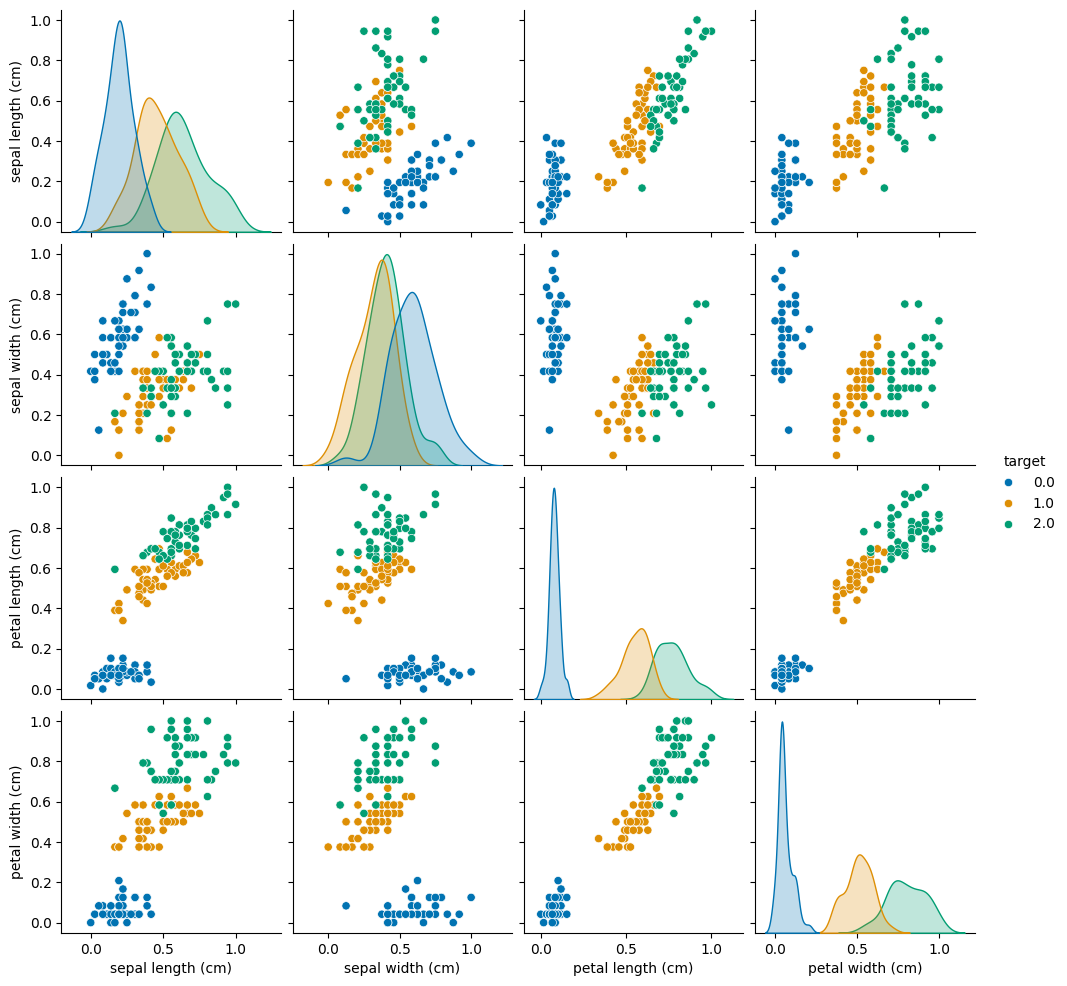

In [7]:
# Let's generate a pairplot and set our target labels as the hue, and use the colorblind colors
sns.pairplot(irisnormdf, hue='target', palette='colorblind')

<Axes: >

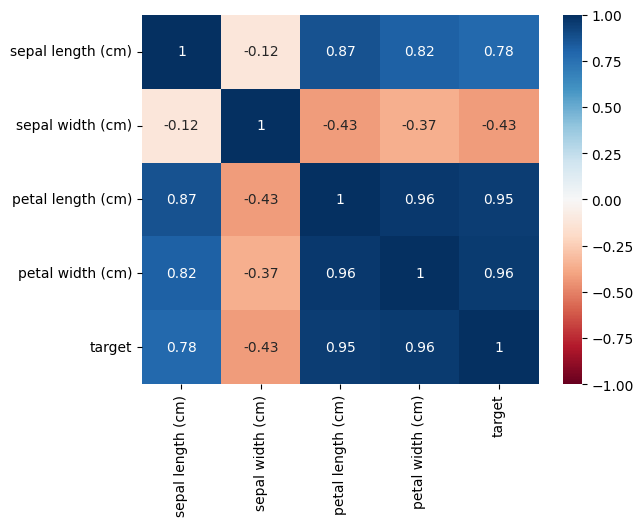

In [8]:
# Let's continue exploring our data by doing a heatmap of our correlation matrix called corr
corr = irisnormdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

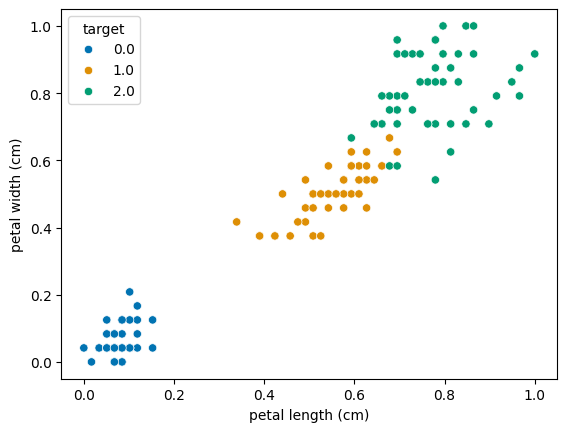

In [9]:
sns.scatterplot(data = irisnormdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = irisnormdf.target, palette='colorblind')

#### Docs on [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
#### create a [matplotlib 3d plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
#### Docs on matplotlib colormaps [maplotlib.cm](https://matplotlib.org/stable/api/cm_api.html)
#### Gallery of differet matplotlib [colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [10]:
from sklearn import decomposition
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
np.random.seed(5)

In [12]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)
XpcaDF = pd.DataFrame(Xpca)
pd.DataFrame(Xpca).describe()

,0,1
count,1.500000e+02,1.500000e+02
mean,-3.694822e-15,-1.652012e-15
std,2.056269e+00,4.926162e-01
min,-3.223804e+00,-1.265971e+00
25%,-2.530348e+00,-3.254152e-01
50%,5.546193e-01,-2.215678e-02
75%,1.550143e+00,3.249152e-01
max,3.795645e+00,1.374165e+00


In [13]:
XpcaDF

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [14]:
XpcaDF.columns = ['PC1', 'PC2']
XpcaDF

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [ ]:
# time to plot!
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(XpcaDF['PC1'], XpcaDF['PC2'], XpcaDF['PC3'], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

<Axes: xlabel='PC1', ylabel='PC2'>

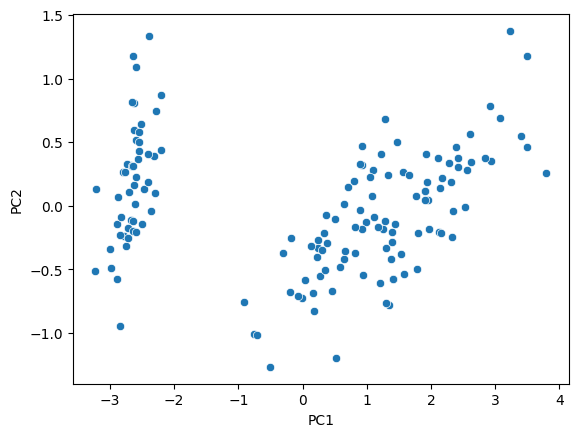

In [16]:
sns.scatterplot(data = XpcaDF, x = 'PC1', y = 'PC2')

In [18]:
pca.explained_variance_ratio_.sum()

0.9776852063187977

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(data = XpcaDF, x = 'PC1',y = 'PC2', hue = y)

In [ ]:
sns.scatterplot(data = XpcaDF, x='PC2', y='PC3', hue = y)

In [ ]:
sns.scatterplot(data = XpcaDF, x='PC1', y='PC3', hue = y)

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)
XpcaDF = pd.DataFrame(Xpca)
pd.DataFrame(Xpca).describe()

In [ ]:
XpcaDF.columns = ['PC1', 'PC2']
XpcaDF

In [ ]:
sns.scatterplot(data = XpcaDF, x = 'PC1',y = 'PC2', hue = y)

In [ ]:
pca.explained_variance_ratio_

## SVD: Singular Value Decomposostion [docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)

Optionally you can use numpy's linear algebra version of SVD [here](https://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15750-s20/www/notebooks/SVD-irises-clustering.html)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
irisnormdf.head()

In [ ]:
y = irisnormdf['target']
irisnormdf = irisnormdf.drop(columns = ['target'])
irisnormdf.head()

In [ ]:
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
svd.fit(irisnormdf)

In [ ]:
svd.explained_variance_ratio_

In [ ]:
svd.explained_variance_ratio_.sum()

In [ ]:
svd.singular_values_

In [ ]:
svd.components_

In [ ]:
# Let's create more components than features
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(irisnormdf) # Notice we get an error

In [ ]:
# Let's create more components than features
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(irisnormdf)

In [ ]:
print(svd.explained_variance_ratio_) # Prints the explained variance for each of the 5 components
print(svd.explained_variance_ratio_.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(svd.singular_values_) # Creates the sigma matrix from the singular values
print(sigma_matrix) # Prints the sigma matrix
singular_vals = svd.singular_values_ # Our singular values
print(singular_vals) # Prints singular values as a vector

In [ ]:
right_matrix = pd.DataFrame(svd.components_)
print('Right Matrix:')
print(right_matrix.shape) # lets check the shape
print(right_matrix)
left_matrix = pd.DataFrame(svd.fit_transform(irisnormdf))/singular_vals
print('Left Matrix:')
print(left_matrix.shape)
print(left_matrix)

Let's do k=3 again

In [ ]:
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)
svd.fit(irisnormdf)

Let's perform our dimensional reduction on your dataframe with svd.transform(X)

In [ ]:
svdIrisdfSL = pd.DataFrame(svd.transform(irisnormdf), columns = ['S1', 'S2', 'S3'])/svd.singular_values_
svdIrisdfSL

In [ ]:
sns.scatterplot(data = svdIrisdfSL, x='S1', y='S2', hue = y)

In [ ]:
sns.scatterplot(data = svdIrisdfSL, x='S2', y='S3', hue = y)

In [ ]:
sns.scatterplot(data = svdIrisdfSL, x='S1', y='S3', hue = y)

In [ ]:
# time to plot!
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
#ycolor = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(svdIrisdfSL['S1'], svdIrisdfSL['S2'], svdIrisdfSL['S3'], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

## [Numpy SVD](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

In [ ]:
U, S, Vh = np.linalg.svd(irisnormdf)

In [ ]:
U

In [ ]:
S

In [ ]:
Vh